# E-Commerce Analysis

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [87]:
df = pd.read_csv('Superstore.csv',encoding= 'unicode_escape')

In [88]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [89]:
df.shape

(9994, 21)

## Data Cleaning

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [91]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Dropping extra column  Raw ID

In [92]:
df.drop(['Row ID'],axis=1,inplace =True)

In [93]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [94]:
pd.isnull(df).sum()    # will provide sum of all null columns

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### There no row with null value so will not use drop command   df.dropna(inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [96]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [97]:
round(df[['Sales','Quantity','Discount','Profit']].describe(),2)

,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00
mean,229.86,3.79,0.16,28.66
std,623.25,2.23,0.21,234.26
min,0.44,1.00,0.00,-6599.98
25%,17.28,2.00,0.00,1.73
50%,54.49,3.00,0.20,8.67
75%,209.94,5.00,0.20,29.36
max,22638.48,14.00,0.80,8399.98


## Exploratory Data Analysis (EDA)

In [98]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Coverting Order Date and Ship Date from Object type to Datetime

In [99]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [102]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day of Week
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,1
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,1
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,6
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,6
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,6


In [106]:
Monthly_revenue=df.groupby('Order Month')['Sales'].sum().reset_index()
Monthly_revenue

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


## 1) Calculate monthly sale of a store and identify which month has highest and lowest sales

C:\Users\abhis\AppData\Local\Temp\ipykernel_24000\1547321015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Order Month',y='Sales',data=Monthly_revenue, palette='Set2')


Text(0.5, 1.0, 'Monthly Sales Overview')

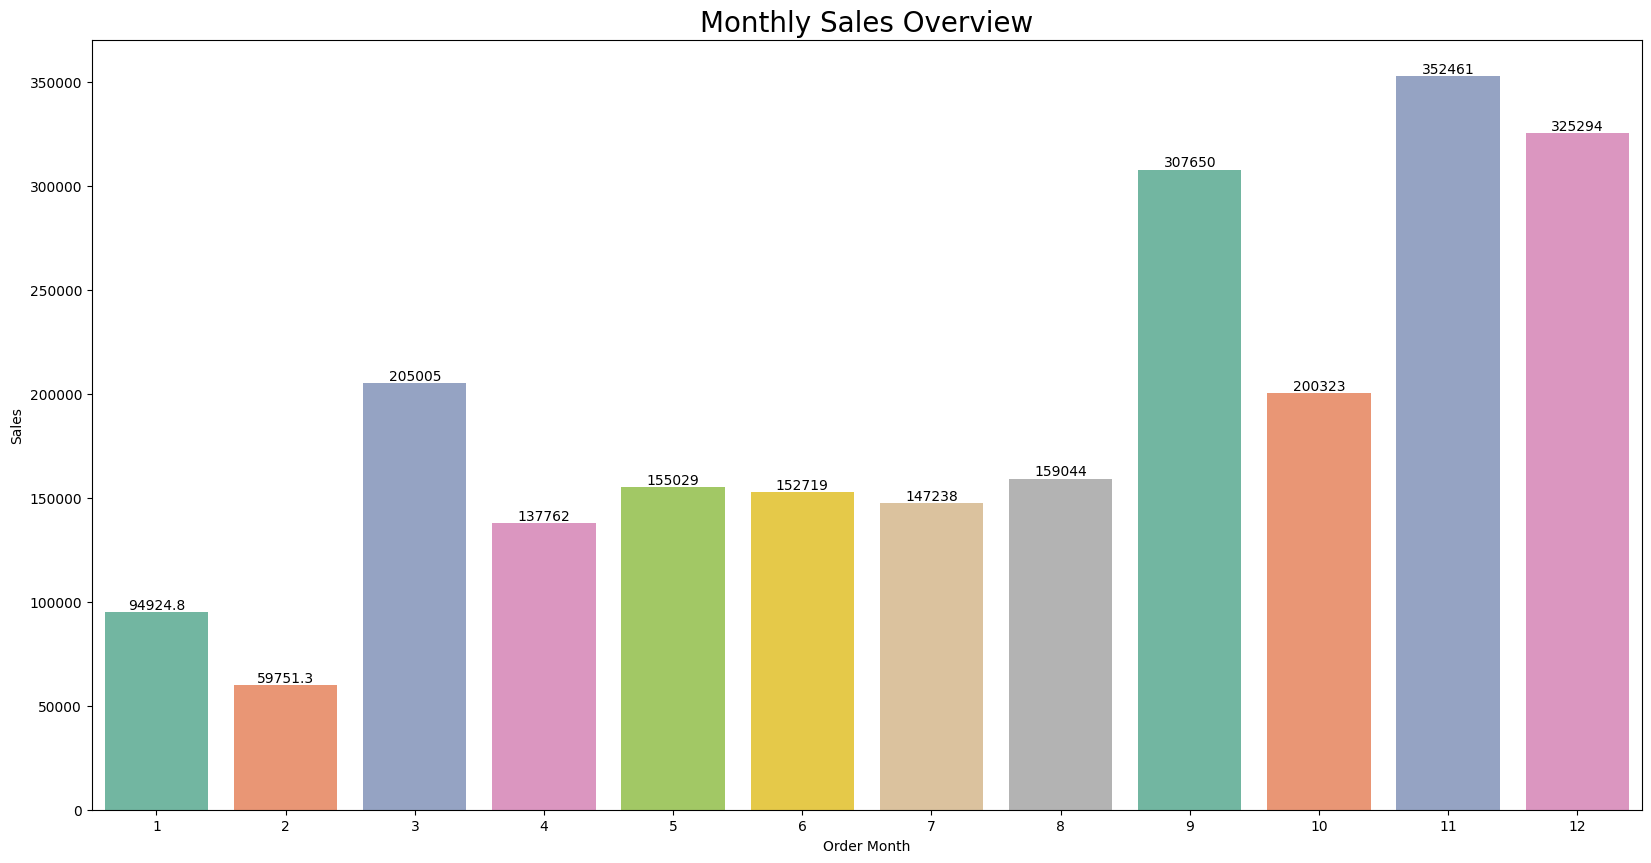

In [114]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='Order Month',y='Sales',data=Monthly_revenue, palette='Set2')

for bar in ax.containers:
    ax.bar_label(bar)

plt.title('Monthly Sales Overview', fontsize=20)

## 2) Calculate sales of a store based on category and identify which category has highest and lowest sales

In [116]:
Revenue_by_Category=df.groupby('Category')['Sales'].sum().reset_index()
Revenue_by_Category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


C:\Users\abhis\AppData\Local\Temp\ipykernel_24000\428317271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Category',y='Sales',data=Revenue_by_Category, palette='Set2')


Text(0.5, 1.0, 'Category Sales Overview')

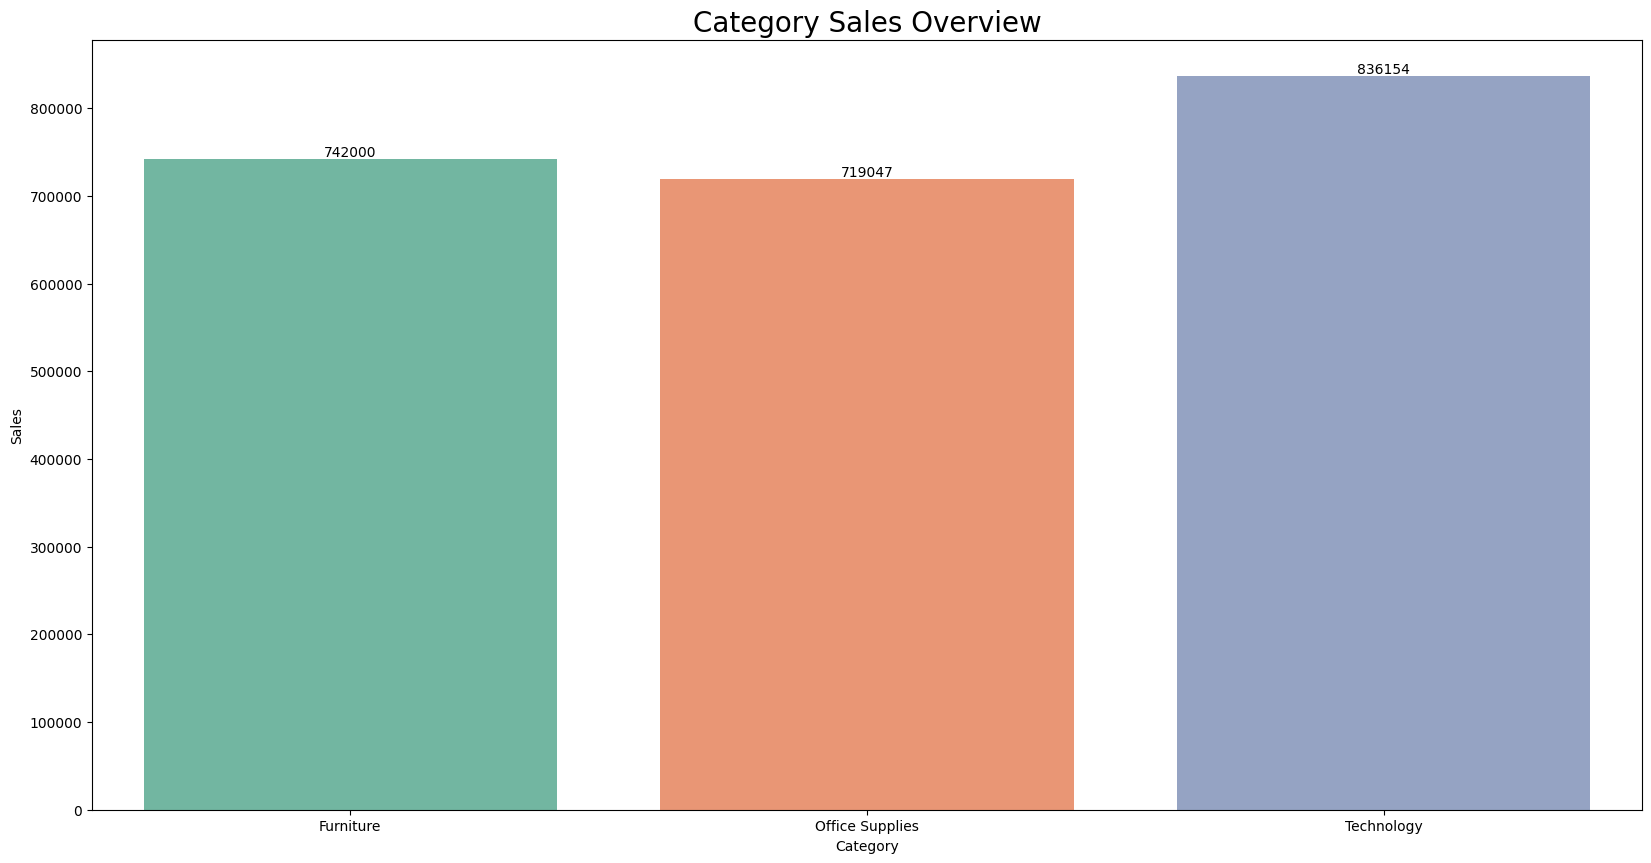

In [117]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='Category',y='Sales',data=Revenue_by_Category, palette='Set2')

for bar in ax.containers:
    ax.bar_label(bar)

plt.title('Category Sales Overview', fontsize=20)

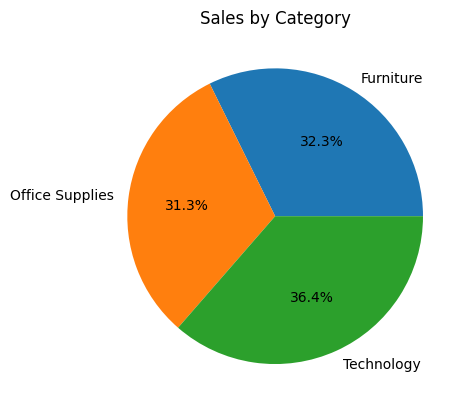

In [150]:
plt.pie(Revenue_by_Category['Sales'], 
        labels=Revenue_by_Category['Category'], 
        autopct='%1.1f%%')
plt.title('Sales by Category')
plt.show()

## 3) Sales Analysis based on sub-category

In [118]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Day of Week'],
      dtype='object')

In [119]:
Revenue_by_SubCategory=df.groupby('Sub-Category')['Sales'].sum().reset_index()
Revenue_by_SubCategory

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


C:\Users\abhis\AppData\Local\Temp\ipykernel_24000\4271689381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Sub-Category',y='Sales',data=Revenue_by_SubCategory, palette='Set2')


Text(0.5, 1.0, 'Sub-Category Sales Overview')

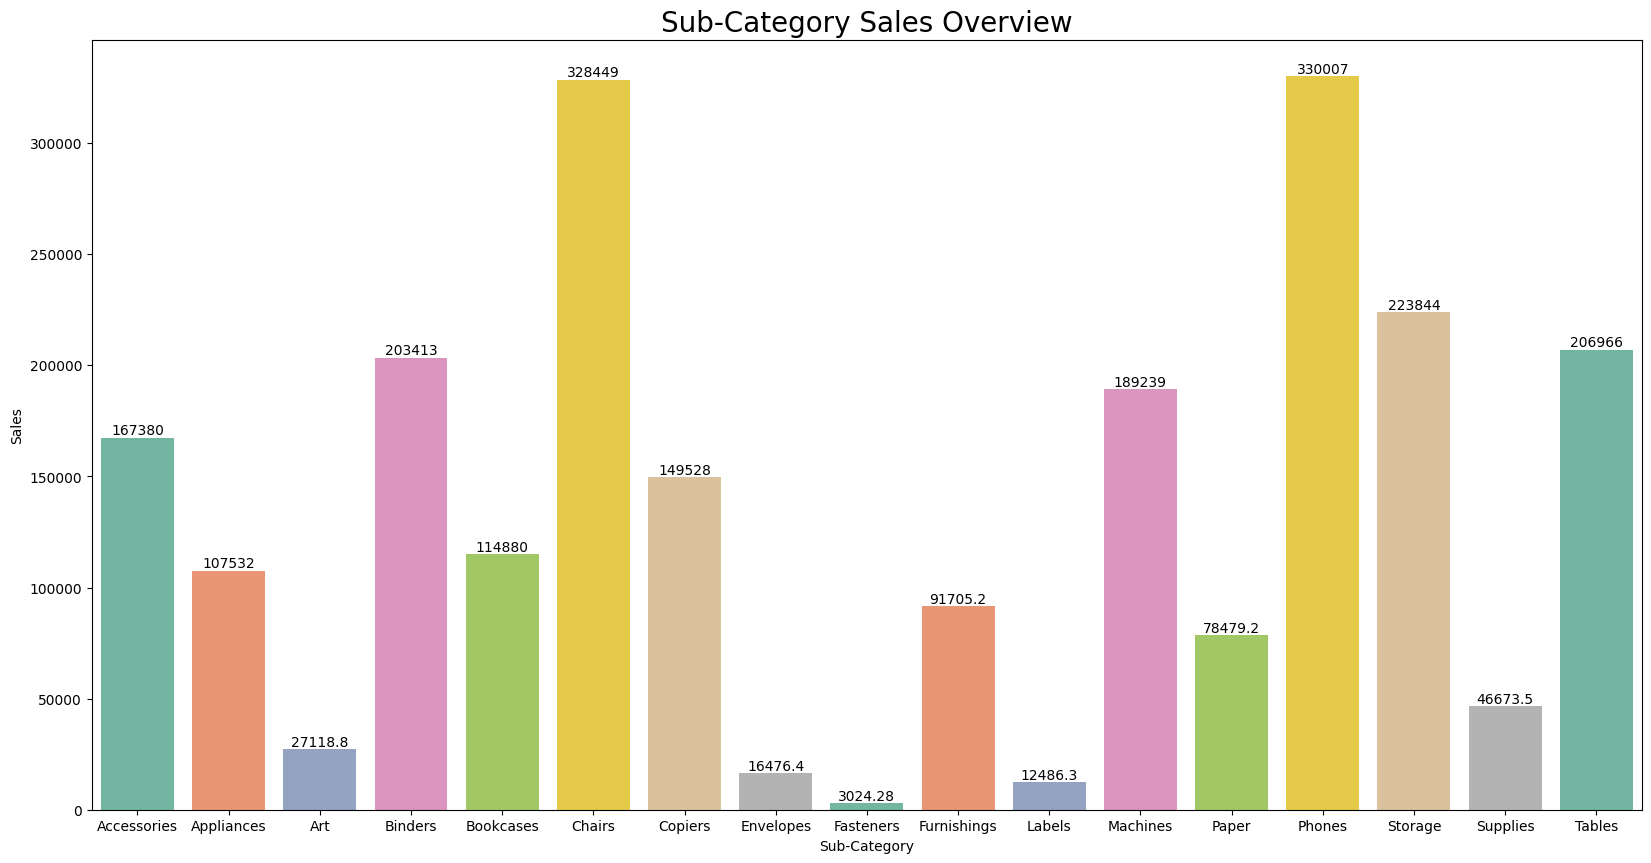

In [120]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='Sub-Category',y='Sales',data=Revenue_by_SubCategory, palette='Set2')

for bar in ax.containers:
    ax.bar_label(bar)

plt.title('Sub-Category Sales Overview', fontsize=20)

## 4) Analyse monthly profit from sales and determine which month has highest profit

In [121]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Day of Week'],
      dtype='object')

In [122]:
Profit_by_Month=df.groupby('Order Month')['Profit'].sum().reset_index()
Profit_by_Month

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


C:\Users\abhis\AppData\Local\Temp\ipykernel_24000\68431904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Order Month',y='Profit',data=Profit_by_Month, palette='Set2')


Text(0.5, 1.0, 'Monthly Profit Overview')

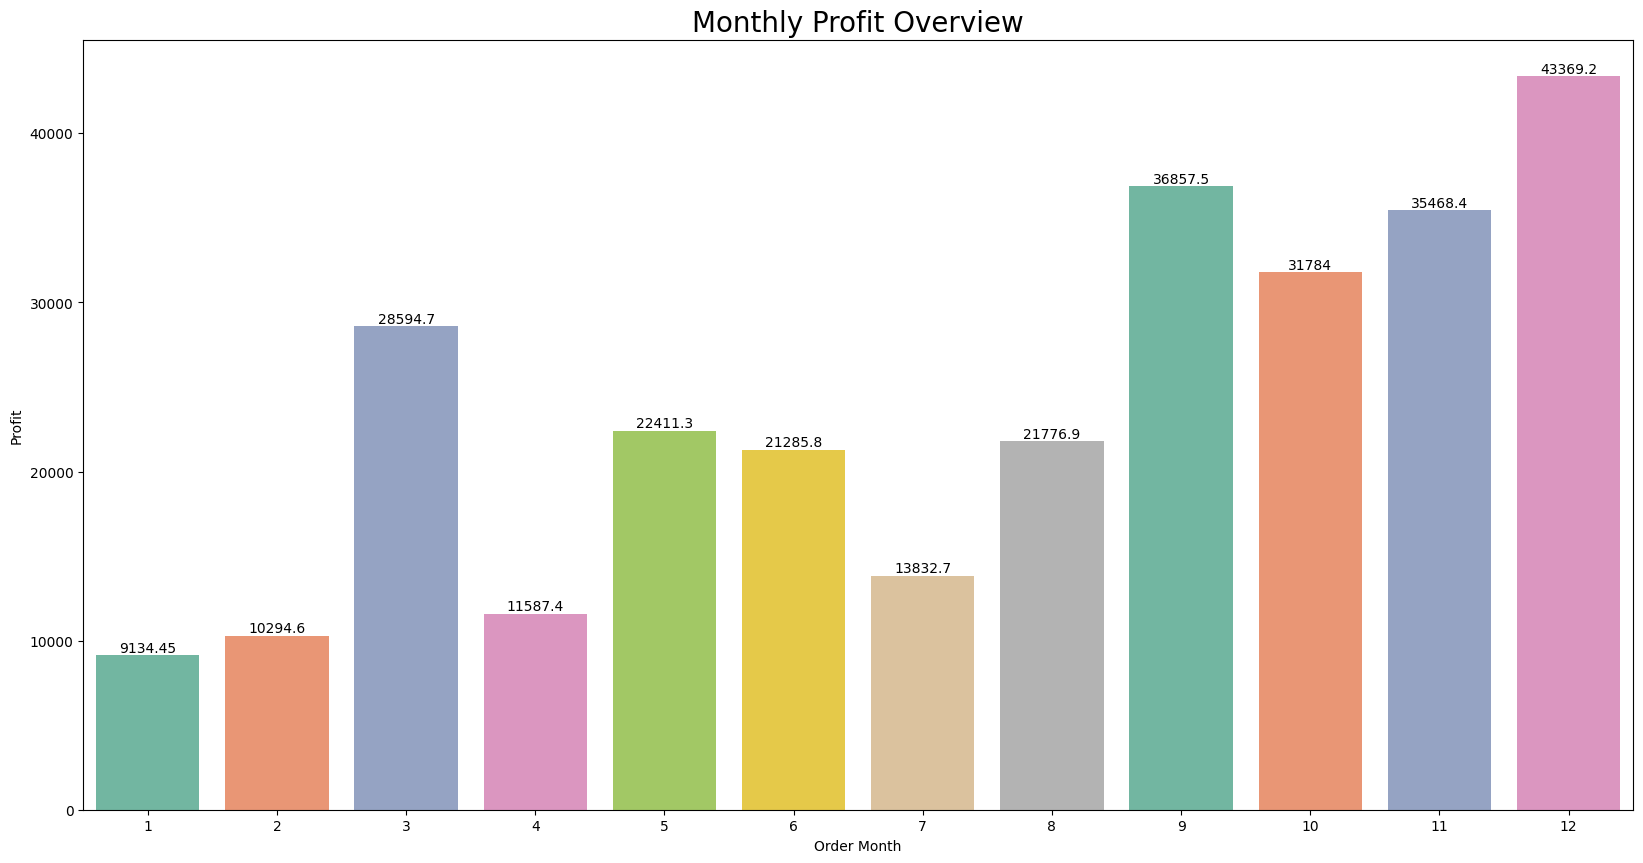

In [123]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='Order Month',y='Profit',data=Profit_by_Month, palette='Set2')

for bar in ax.containers:
    ax.bar_label(bar)

plt.title('Monthly Profit Overview', fontsize=20)

## 5) Analyse profit by category and subcategory

In [124]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Day of Week'],
      dtype='object')

In [126]:
Profit_by_category_subcategory=df.groupby(['Category','Sub-Category'])['Profit'].sum().reset_index()
Profit_by_category_subcategory

,Category,Sub-Category,Profit
0,Furniture,Bookcases,-3472.5560
1,Furniture,Chairs,26590.1663
2,Furniture,Furnishings,13059.1436
3,Furniture,Tables,-17725.4811
4,Office Supplies,Appliances,18138.0054
5,Office Supplies,Art,6527.7870
6,Office Supplies,Binders,30221.7633
7,Office Supplies,Envelopes,6964.1767
8,Office Supplies,Fasteners,949.5182
9,Office Supplies,Labels,5546.2540


Text(0.5, 1.0, ' Profit Overview based on Category & Sub-Category')

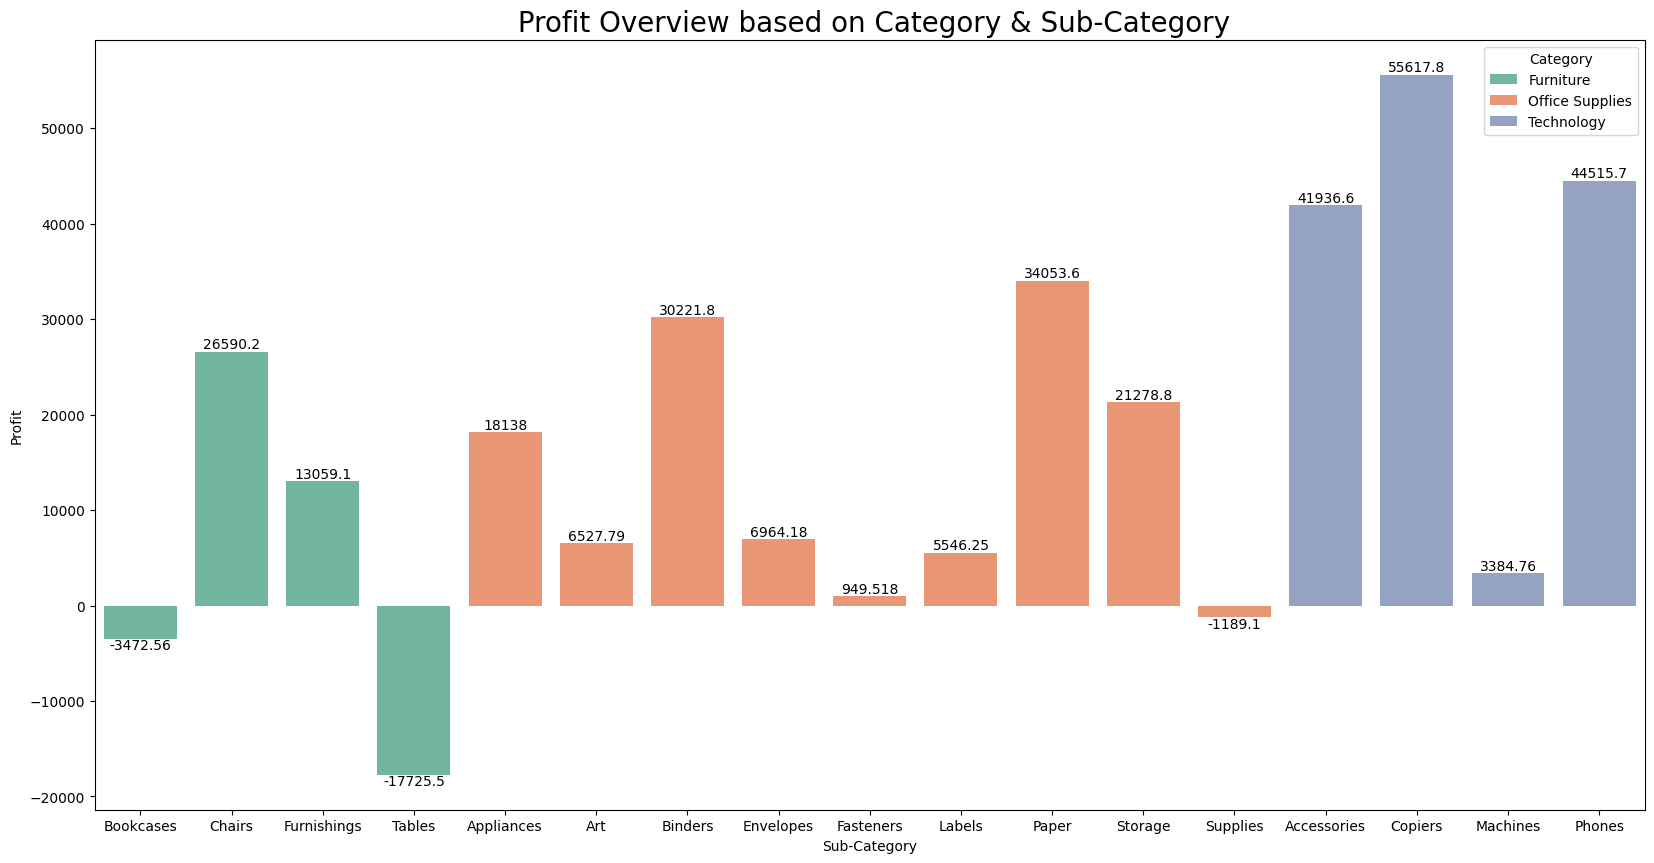

In [127]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='Sub-Category',y='Profit',hue='Category',data=Profit_by_category_subcategory, palette='Set2')

for bar in ax.containers:
    ax.bar_label(bar)

plt.title(' Profit Overview based on Category & Sub-Category', fontsize=20)

## 6) Analyse sales and profit by customer segment

In [128]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Day of Week'],
      dtype='object')

In [166]:
Profit_Sales_by_segement=df.groupby(['Segment'])[['Profit','Sales']].sum().reset_index()
Profit_Sales_by_segement

,Segment,Profit,Sales
0,Consumer,134119.2092,1.161401e+06
1,Corporate,91979.1340,7.061464e+05
2,Home Office,60298.6785,4.296531e+05


C:\Users\abhis\AppData\Local\Temp\ipykernel_24000\2842210759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Segment', y='Sales', data=Profit_Sales_by_segement, palette='Set2')
C:\Users\abhis\AppData\Local\Temp\ipykernel_24000\2842210759.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Segment', y='Profit', data=Profit_Sales_by_segement, palette='Set2')


Text(0.5, 1.0, 'Profit by Segment')

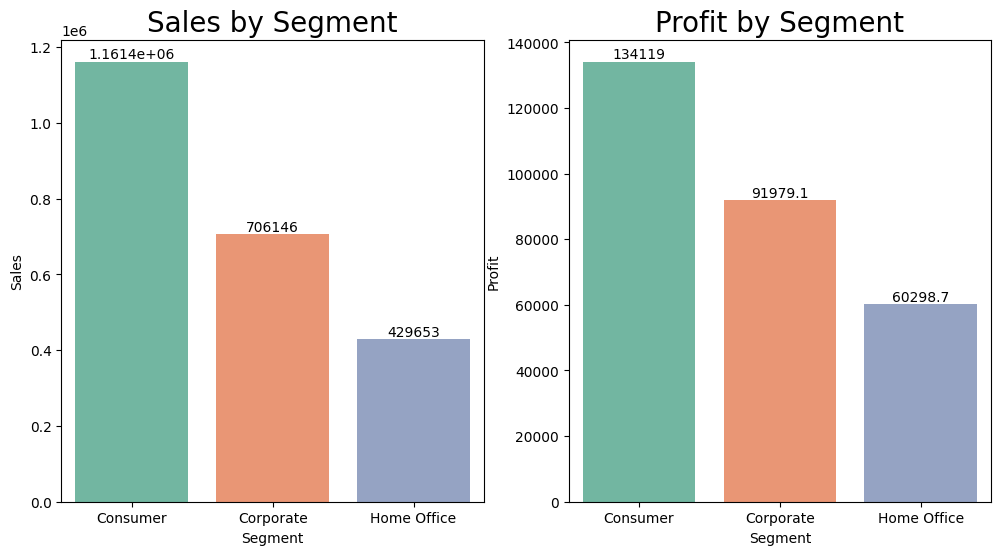

In [167]:
plt.figure(figsize=(12, 6))

# Sales Barplot
plt.subplot(1, 2, 1)
ax=sns.barplot(x='Segment', y='Sales', data=Profit_Sales_by_segement, palette='Set2')

for bar in ax.containers:
    ax.bar_label(bar)

plt.title('Sales by Segment', fontsize=20)

# Profit Barplot
plt.subplot(1, 2, 2)
ax=sns.barplot(x='Segment', y='Profit', data=Profit_Sales_by_segement, palette='Set2')

for bar in ax.containers:
    ax.bar_label(bar)
    
plt.title('Profit by Segment',fontsize=20)


## 7) Analyse Sales to Profit Ratio

In [171]:
# Calculate Sales to Profit Ratio
Profit_Sales_by_segement['Sales_to_Profit_Ratio'] = Profit_Sales_by_segement['Sales'] / Profit_Sales_by_segement['Profit']

Profit_Sales_by_segement

,Segment,Profit,Sales,Sales_to_Profit_Ratio
0,Consumer,134119.2092,1.161401e+06,8.659471
1,Corporate,91979.1340,7.061464e+05,7.677245
2,Home Office,60298.6785,4.296531e+05,7.125416


C:\Users\abhis\AppData\Local\Temp\ipykernel_24000\1333542591.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Segment', y='Sales_to_Profit_Ratio', data=Profit_Sales_by_segement, palette='Set2')


Text(0, 0.5, 'Sales to Profit Ratio')

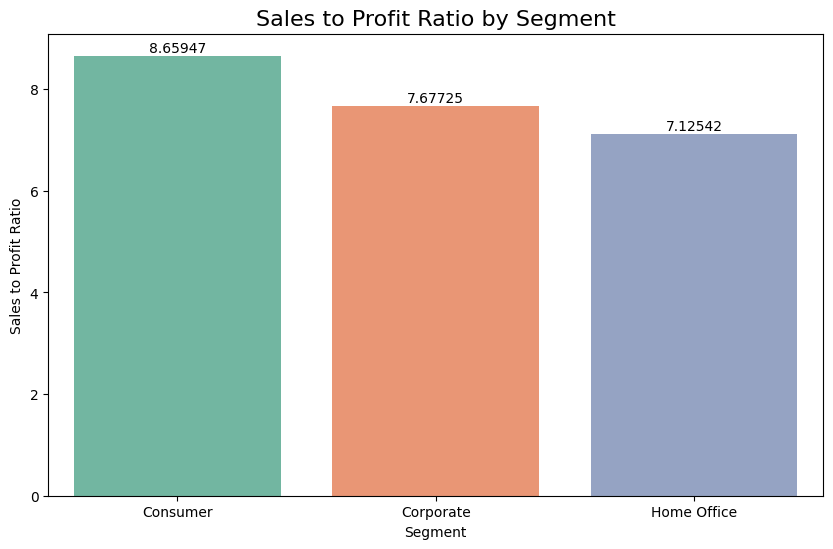

In [172]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Segment', y='Sales_to_Profit_Ratio', data=Profit_Sales_by_segement, palette='Set2')

for bar in ax.containers:
    ax.bar_label(bar)

plt.title('Sales to Profit Ratio by Segment', fontsize=16)
plt.xlabel('Segment')
plt.ylabel('Sales to Profit Ratio')